#### intro: [Which one to choose for your Problem?](https://www.youtube.com/watch?v=38SUUaMX5Rg&ab_channel=KrishNaikKrishNaikVerified)

In [17]:
import os

os.chdir("E:/code/6.MachineLearning/1_KNN_algorithm/data")

In [18]:
import pandas as pd

df = pd.read_csv("Classified Data", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
print(len(df["TARGET CLASS"][df["TARGET CLASS"]==1])) #500
print(len(df["TARGET CLASS"][df["TARGET CLASS"]==0])) #500

500
500


### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [21]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [22]:
df1 = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])
df1.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Data Visualization(Pair plot)

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.pairplot(df, hue="TARGET CLASS")
# plt.show()

In [16]:
X = df1.values
y = df.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=46)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.94

In [53]:
confusion_matrix(y_test, y_pred)

array([[145,  17],
       [  1, 137]], dtype=int64)

In [61]:
tf,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       162
           1       0.89      0.99      0.94       138

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



### Choosing a K Value
- Let's go ahead and use the elbow method to pick a good K Value:

In [46]:
import numpy as np

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

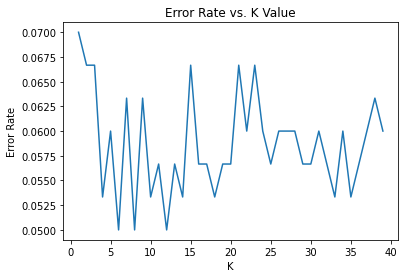

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(1,40), error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

#### Note: as the kvalue increases the error rate will decreases

In [50]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[145  17]
 [  4 134]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       162
           1       0.89      0.97      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [51]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[144  18]
 [  2 136]]


              precision    recall  f1-score   support

           0       0.99      0.89      0.94       162
           1       0.88      0.99      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



["explaination"](https://www.youtube.com/watch?v=otolSnbanQk&ab_channel=KrishNaikKrishNaikVerified)